In [98]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import pandas as pd
import numpy as np
import seaborn as sns
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [147]:
# Read in the data
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [148]:
# Look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [149]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


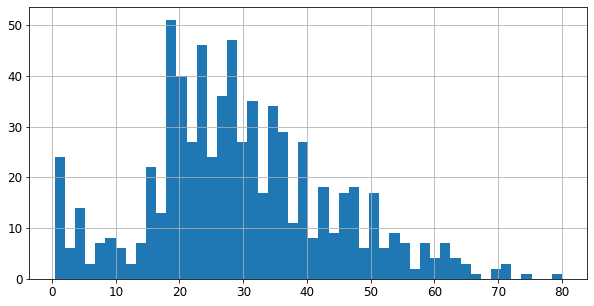

In [150]:
# Look at age distributions
df["Age"].hist(bins=50, figsize=(10,5))

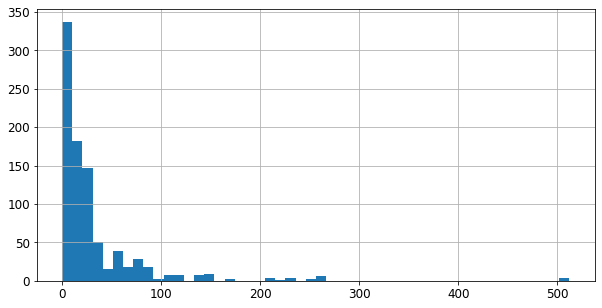

In [151]:
# Fare distribution
df["Fare"].hist(bins=50, figsize=(10,5))

In [152]:
# Is survival correlated with age? 
df['Survived'].corr(df['Age'])

-0.07722109457217764

In [153]:
# Create numeric categories for the sex and embarkation columns
df['Sex_Num'] =df['Sex'].astype('category').cat.codes
df['Emb_Num'] =df['Embarked'].astype('category').cat.codes

In [154]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Num,Emb_Num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2


In [155]:
# Look at correlations with survival of differing variables. 

df[df.columns[0:]].corr()['Survived'][:]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Sex_Num       -0.543351
Emb_Num       -0.176509
Name: Survived, dtype: float64

In [109]:
# Subset the dataframe to the columns I'm interested in 
df_full = df
df = df_full[['Survived','Pclass','Age','Sex_Num']]

In [110]:
df.head()

,Survived,Pclass,Age,Sex_Num
0,0,3,22.0,1
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,1


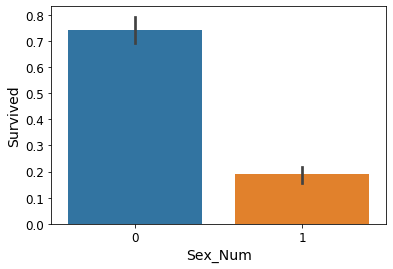

In [111]:
# Barplot of survival by sex
sns.barplot(x=df["Sex_Num"], y=df["Survived"] )

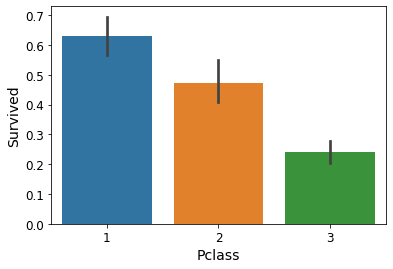

In [112]:
# Barplot of survival by Class
sns.barplot(x=df["Pclass"], y=df["Survived"] )

In [158]:
# A barplot by age would look ridiculous so this puts ages into three bins. 
bins = [0, 18, 35, 150]
df['Age_Bin'] = pd.cut(df['Age'], bins)

# Convert the bins to numeric categories
df['Age_Bin'] =df['Age_Bin'].astype('category').cat.codes

# Count passengers per bin
df['Age_Bin'].value_counts()

 1    358
 2    217
-1    177
 0    139
Name: Age_Bin, dtype: int64

In [159]:
# Average age per bin to make sure it worked
df.groupby('Age_Bin').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Num,Emb_Num
Age_Bin,,,,,,,,,
-1,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567,0.700565,1.293785
0,445.496403,0.503597,2.561151,10.717050,1.258993,0.935252,32.500721,0.510791,1.539568
1,443.888268,0.382682,2.368715,26.594972,0.324022,0.215084,29.925929,0.664804,1.639665
2,458.304147,0.382488,1.811060,46.979263,0.345622,0.465438,43.966821,0.663594,1.534562


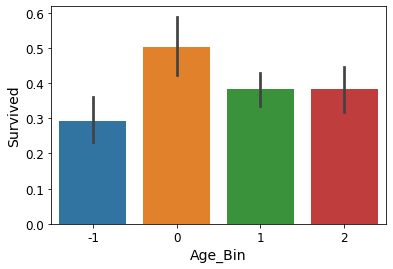

In [160]:
# Barplot of survival by age
sns.barplot(x=df["Age_Bin"], y=df["Survived"] )

In [161]:
# 177 records are missing age (bin = -1). These people have a much lower survival rate which is interesting in and of itself, but for practice let's impute the median age into their records. 

median = df["Age"].median()
df["Age"].fillna(median, inplace=True)

In [162]:
# Repeat cuts and bins
df['Age_Bin'] = pd.cut(df['Age'], bins)
df['Age_Bin'] =df['Age_Bin'].astype('category').cat.codes
df['Age_Bin'].value_counts()

1    535
2    217
0    139
Name: Age_Bin, dtype: int64

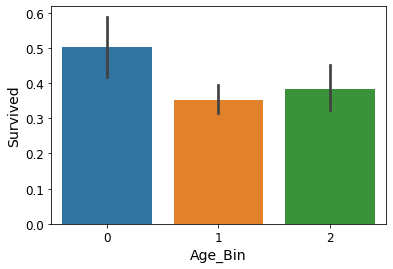

In [163]:
# New barplot by age
sns.barplot(x=df["Age_Bin"], y=df["Survived"] )

## Ignore everything below for now.... my early attempts to model....! 

In [124]:
df_labels = df["Survived"].copy()

In [125]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df, df_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
# let's try the full preprocessing pipeline on a few training instances
some_data = df.iloc[:4]
some_labels = df_labels.iloc[:4]



In [144]:
print("Predictions:", lin_reg.predict(some_data))

Predictions: [-9.33207905e-17  1.00000000e+00  1.00000000e+00  1.00000000e+00]


In [145]:
print("Labels:", list(some_labels))

Labels: [0, 1, 1, 1]
